# Load Ardupilot .bin log files

These logs contains 2 chuncks of data.

- PARM: list of parameters that can be set and their values
- then there's messages, that is the values of what is actually logged (ex: battery voltage, GPS, IMU...)

https://ardupilot.org/copter/docs/logmessages.html#logmessages

Info on getting time, date from GPS time (GWk and GMS)
- https://stackoverflow.com/questions/33415475/how-to-get-current-date-and-time-from-gps-unsegment-time-in-python
- https://ardupilot.org/copter/docs/logmessages.html#gps
- https://en.racelogic.support/LabSat_GNSS_Simulators/LabSat_General_Knowledgebase/LabSat_Leap_Second_Guide
- https://discuss.ardupilot.org/t/converting-log-file-gms-gwk-to-correct-utc/69576



In [7]:
%matplotlib inline

In [8]:
from ardupilot_log_reader.reader import Ardupilot
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# import utm
# import math

from numpy.random import RandomState

# for date time management

import matplotlib.dates as mdates
import datetime as dt

In [9]:
HOME = os.getenv("HOME")
PATH2FILES = f'.'
# PATH2FILES = f'{HOME}/Data/Drones/Flight_Logs/GPS_VIO'
PATH2FILES = f'{HOME}/pCloudDrive/ITRI/Drones_UAV/FlightLogs/GPS_VIO'
# LOGNAME = '2024-07-18 15-26-17.bin' # dynamic flight
LOGNAME = 'StationaryDroneChangeAntennaLoc_20240719_145656.bin'
FULLNAME = f'{PATH2FILES}/{LOGNAME}'

In [10]:

# parser = Ardupilot.parse(FULLNAME,types=['XKF1','XKF2','GPS','VISP', 'VISV', 'NOT_A_MESSAGE']) # adding a type not present in the log don't raise an error
parser = Ardupilot.parse(FULLNAME,types=['XKF1','XKF2','GPS','VISP', 'VISV','MAG'])


In [5]:
print(parser.dfs.keys())

dict_keys(['PARM', 'MAG', 'XKF1', 'XKF2', 'GPS'])


In [6]:
print(parser.dfs)

{'PARM':          timestamp     TimeUS             Name    Value  Default
0     1.721372e+09    6536031   FORMAT_VERSION    120.0    120.0
1     1.721372e+09    6536041    SYSID_THISMAV      1.0      1.0
2     1.721372e+09    6536062      SYSID_MYGCS    255.0    255.0
3     1.721372e+09    6536079   PILOT_THR_FILT      0.0      0.0
4     1.721372e+09    6536096  PILOT_TKOFF_ALT      0.0      0.0
...            ...        ...              ...      ...      ...
1208  1.721373e+09  462533591     STAT_RUNTIME  23222.0      NaN
1209  1.721373e+09  493533297     STAT_RUNTIME  23253.0      NaN
1210  1.721373e+09  524533711     STAT_RUNTIME  23284.0      NaN
1211  1.721373e+09  555533458     STAT_RUNTIME  23315.0      NaN
1212  1.721373e+09  586533288     STAT_RUNTIME  23346.0      NaN

[1213 rows x 5 columns], 'MAG':          timestamp     TimeUS  I  MagX  MagY  MagZ  OfsX  OfsY  OfsZ  MOX  \
0     1.721372e+09    6632594  0  -258   195   390   -17    48    32    0   
1     1.721372e+09    66

In [7]:
print(parser.dfs['PARM'])

         timestamp     TimeUS             Name         Value  Default
0     1.721360e+09   62446981   FORMAT_VERSION    120.000000    120.0
1     1.721360e+09   62447012    SYSID_THISMAV      1.000000      1.0
2     1.721360e+09   62447019      SYSID_MYGCS    255.000000    255.0
3     1.721360e+09   62447025   PILOT_THR_FILT      0.000000      0.0
4     1.721360e+09   62447033  PILOT_TKOFF_ALT      0.000000      0.0
...            ...        ...              ...           ...      ...
1198  1.721360e+09  122244106     STAT_RUNTIME  22360.000000      NaN
1199  1.721360e+09  130343887   MOT_THST_HOVER      0.243641      NaN
1200  1.721360e+09  146744372   MOT_THST_HOVER      0.243641      NaN
1201  1.721360e+09  153244106     STAT_RUNTIME  22391.000000      NaN
1202  1.721360e+09  163644431   MOT_THST_HOVER      0.243641      NaN

[1203 rows x 5 columns]


In [8]:
print(parser.dfs['PARM'][:20])

       timestamp    TimeUS              Name   Value  Default
0   1.721360e+09  62446981    FORMAT_VERSION   120.0    120.0
1   1.721360e+09  62447012     SYSID_THISMAV     1.0      1.0
2   1.721360e+09  62447019       SYSID_MYGCS   255.0    255.0
3   1.721360e+09  62447025    PILOT_THR_FILT     0.0      0.0
4   1.721360e+09  62447033   PILOT_TKOFF_ALT     0.0      0.0
5   1.721360e+09  62447040     PILOT_THR_BHV     0.0      0.0
6   1.721360e+09  62447048      SERIAL0_BAUD   115.0    115.0
7   1.721360e+09  62447068  SERIAL0_PROTOCOL     2.0      2.0
8   1.721360e+09  62447097  SERIAL1_PROTOCOL     2.0     33.0
9   1.721360e+09  62447106      SERIAL1_BAUD  1500.0     57.0
10  1.721360e+09  62447114  SERIAL2_PROTOCOL     2.0      2.0
11  1.721360e+09  62447150      SERIAL2_BAUD    57.0     57.0
12  1.721360e+09  62447158  SERIAL3_PROTOCOL    37.0     37.0
13  1.721360e+09  62447167      SERIAL3_BAUD   230.0    230.0
14  1.721360e+09  62447175  SERIAL4_PROTOCOL     5.0      5.0
15  1.72

In [9]:
print(parser.dfs['MAG'])

         timestamp     TimeUS  I  MagX  MagY  MagZ  OfsX  OfsY  OfsZ  MOX  \
0     1.721288e+09   69822408  0  -221  -221   302   -17    48    32    0   
1     1.721288e+09   69922300  0  -219  -220   305   -17    48    32    0   
2     1.721288e+09   70022264  0  -220  -221   305   -17    48    32    0   
3     1.721288e+09   70122269  0  -221  -221   304   -17    48    32    0   
4     1.721288e+09   70222300  0  -221  -220   304   -17    48    32    0   
...            ...        ... ..   ...   ...   ...   ...   ...   ...  ...   
5349  1.721288e+09  695822440  0  -181  -234   322   -17    48    32    0   
5350  1.721288e+09  695922243  0  -181  -234   323   -17    48    32    0   
5351  1.721288e+09  696022244  0  -180  -234   320   -17    48    32    0   
5352  1.721288e+09  696122256  0  -181  -233   320   -17    48    32    0   
5353  1.721288e+09  696222227  0  -181  -234   325   -17    48    32    0   

      MOY  MOZ  Health          S  
0       0    0       1   69822407  
1  

In [10]:
print(parser.dfs['VISV'])

         timestamp     TimeUS           RTimeUS  CTimeMS        VX        VY  \
0     1.721288e+09  127542450  1716906469403747   127539 -0.003411 -0.007669   
1     1.721288e+09  127602598  1716906469464669   127600 -0.003756 -0.007589   
2     1.721288e+09  127652585  1716906469513685   127649 -0.003642 -0.007391   
3     1.721288e+09  127694866  1716906469555926   127691 -0.003163 -0.007199   
4     1.721288e+09  127742425  1716906469604557   127740 -0.003154 -0.007358   
...            ...        ...               ...      ...       ...       ...   
7727  1.721288e+09  694692402  1716907036536975   694689 -0.015220  0.001374   
7728  1.721288e+09  694747406  1716907036592770   694745 -0.014913  0.001038   
7729  1.721288e+09  694799915  1716907036645015   694797 -0.015290  0.000768   
7730  1.721288e+09  694844912  1716907036689112   694841 -0.015256  0.000297   
7731  1.721288e+09  694892354  1716907036736818   694889 -0.015589 -0.000007   

            VZ  VErr  Rst  Ign  Q  
0  

In [11]:
print(parser.dfs['GPS'])

         timestamp     TimeUS  I  Status        GMS   GWk  NSats  HDop  \
0     1.721288e+09   69862372  0       3  372395200  2323     18  0.64   
1     1.721288e+09   70062412  0       3  372395400  2323     18  0.64   
2     1.721288e+09   70262412  0       3  372395600  2323     18  0.64   
3     1.721288e+09   70462759  0       3  372395800  2323     18  0.64   
4     1.721288e+09   70682370  0       3  372396000  2323     18  0.64   
...            ...        ... ..     ...        ...   ...    ...   ...   
2674  1.721288e+09  695282330  0       3  373020600  2323     16  0.68   
2675  1.721288e+09  695482360  0       3  373020800  2323     15  0.73   
2676  1.721288e+09  695682399  0       3  373021000  2323     15  0.73   
2677  1.721288e+09  695882543  0       3  373021200  2323     15  0.73   
2678  1.721288e+09  696082348  0       3  373021400  2323     15  0.73   

            Lat         Lng     Alt    Spd        GCrs     VZ  Yaw  U  
0     24.773679  121.045868  132.43  0.

In [11]:
mydf = parser.dfs['PARM']
print(mydf[mydf['Name'].str.contains('KF')])

         timestamp   TimeUS           Name  Value  Default
74    1.721372e+09  6536661  FS_EKF_ACTION    1.0      1.0
75    1.721372e+09  6536668  FS_EKF_THRESH    0.8      0.8
381   1.721372e+09  6545692  AHRS_EKF_TYPE    3.0      3.0
1146  1.721372e+09  6657638    FS_EKF_FILT    5.0      5.0


In [6]:

print(mydf[mydf['Name'].str.contains('IMU')])

        timestamp   TimeUS          Name  Value  Default
557  1.721372e+09  6550800  EK3_IMU_MASK    3.0      3.0


In [6]:
parser.dfs['GPS'][0:1]

,timestamp,TimeUS,I,Status,GMS,GWk,NSats,HDop,Lat,Lng,Alt,Spd,GCrs,VZ,Yaw,U
0,1.721372e+09,13952710,0,1,457012000,0,0,99.99,24.774096,121.043936,135.26,0.0,0.0,0.0,0.0,1


In [12]:
mydf_gps = parser.dfs['GPS']
# mydf_visp = parser.dfs['VISP'] # no VISP this time
mydf_mag = parser.dfs['MAG']

In [22]:
# print(mydf_gps[-2:-1])
print(mydf_gps[:5])
print(mydf_gps[-5:])

      timestamp    TimeUS  I  Status        GMS   GWk  NSats   HDop  \
0  1.721372e+09  13952710  0       1  457012000     0      0  99.99   
1  1.721372e+09  14152720  0       1  457012200  2323      0  99.99   
2  1.721372e+09  14352642  0       1  457012400  2323      0  99.99   
3  1.721372e+09  14532783  0       1  457012600  2323      0  99.99   
4  1.721372e+09  14732813  0       1  457012800  2323      0  99.99   

         Lat         Lng     Alt  Spd  GCrs   VZ  Yaw  U  
0  24.774096  121.043936  135.26  0.0   0.0  0.0  0.0  1  
1  24.774096  121.043936  135.26  0.0   0.0  0.0  0.0  1  
2  24.774096  121.043936  135.26  0.0   0.0  0.0  0.0  1  
3  24.774096  121.043936  135.26  0.0   0.0  0.0  0.0  1  
4  24.774096  121.043936  135.26  0.0   0.0  0.0  0.0  1  
         timestamp     TimeUS  I  Status        GMS   GWk  NSats  HDop  \
2920  1.721373e+09  597992655  0       3  457596000  2323      9  1.43   
2921  1.721373e+09  598192719  0       3  457596200  2323      9  1.43 

#### Get local time from GPS time

Install the following if needed.

The ardupilot log provides GMS and GWk, corresponding to the number of milliseconds since the start of GPS week started and the number of weeks seince 5 jan 1980, respectively.

See: https://ardupilot.org/copter/docs/logmessages.html#gps


In [13]:
# !pip uninstall -y leapseconds
# !pip install astropy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 22.2 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.0 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 5.1 MB/s eta 0:00:000m eta 0:00:01


In [14]:
from astropy.time import Time

In [15]:
def gps2utc(gpsweek, gpsmilliseconds):
    """ GPS time to UTC + 8.

    Parameters
    ----------
    gpsweek : int
        GPS week number, i.e. 1866.
    gpsseconds : int
        Number of milli seconds since the beginning of week (GMS).
    gpsseconds : int
        Number of seconds since the beginning of week.

    Returns
    -------
    datetime
        datetime instance with UTC time.
    """
    gpsseconds = gpsmilliseconds / 1000
    second_in_8hrs = 8*3600
    gpsseconds = gpsseconds + second_in_8hrs
    print(f'GPS week: {gpsweek}, GPS seconds: {gpsseconds}')
    secs_in_week = 604800
    secs = gpsweek * secs_in_week + gpsseconds

    
    t_gps = Time(secs, format="gps")
    t_utc = Time(t_gps, format="iso", scale="utc")

    return t_utc.datetime

In [16]:
# start and end time of log
logtstart = gps2utc(mydf_gps['GWk'][1],mydf_gps['GMS'][1])
logtend = gps2utc(mydf_gps['GWk'][len(mydf_gps)-1],mydf_gps['GMS'][len(mydf_gps)-1])
print(f'log started on {logtstart}, ended on {logtend}')

GPS week: 2323, GPS seconds: 485812.2
GPS week: 2323, GPS seconds: 486396.8
log started on 2024-07-19 14:56:34.200000, ended on 2024-07-19 15:06:18.800000


In [24]:
# get the date and time for all the points
datetime_gps = gps2utc(mydf_gps['GWk'][1:-1],mydf_gps['GMS'][1:-1])
print(datetime_gps[0])

GPS week: 1       2323
2       2323
3       2323
4       2323
5       2323
        ... 
2919    2323
2920    2323
2921    2323
2922    2323
2923    2323
Name: GWk, Length: 2923, dtype: int64, GPS seconds: 1       485812.2
2       485812.4
3       485812.6
4       485812.8
5       485813.0
          ...   
2919    486395.8
2920    486396.0
2921    486396.2
2922    486396.4
2923    486396.6
Name: GMS, Length: 2923, dtype: float64
2024-07-19 14:56:34.200000


In [58]:
ttime = gps2utc(2151,150825)
print(ttime)
print(ttime.hour)
print(ttime.minute)

GPS week: 2151, GPS seconds: 150.825
2021-03-28 00:02:12.825000


In [36]:
# doing it manually
mytime = mydf_gps['GMS'][10] #1092121243.0
# mytime = 457012000
print(f'GPS timestamp = {mytime}')
t = Time(mytime, format='gps')
# t = Time(t, format='iso') # same as scale='tai'
t = Time(t, format='iso', scale='utc') # 
print(t)

GPS timestamp = 457014000
1994-06-30 12:19:51.000


### GPS log analysis

In [12]:
# Yaw from GPS: only with GPS with 2 antennas
# print(mydf_gps['Yaw']) 

In [17]:
print(mydf_gps['NSats'])

0       18
1       18
2       18
3       18
4       18
        ..
2674    16
2675    15
2676    15
2677    15
2678    15
Name: NSats, Length: 2679, dtype: int64


In [17]:
nsats = mydf_gps['NSats'].to_numpy()
gps_speed = mydf_gps['Spd'].to_numpy()
gps_vz = mydf_gps['VZ'].to_numpy()
gps_hdop = mydf_gps['HDop'].to_numpy()
gps_ts = mydf_gps['timestamp'].to_numpy()
gps_tus = mydf_gps['TimeUS'].to_numpy()

In [19]:
gps_tus_avg = np.mean(gps_tus[:100])/1e6
print(f'average samp time (from GPS) in us: {gps_tus_avg}')
gps_t = np.arange(len(gps_ts))*gps_tus_avg

average samp time (from GPS) in us: 23.84375289


In [18]:
# zoomrange = np.arange(1500,2000)
zoomrange = np.arange(0,300)
zoomrange1 = np.arange(0,100)
zoomrange2 = np.arange(150,250)

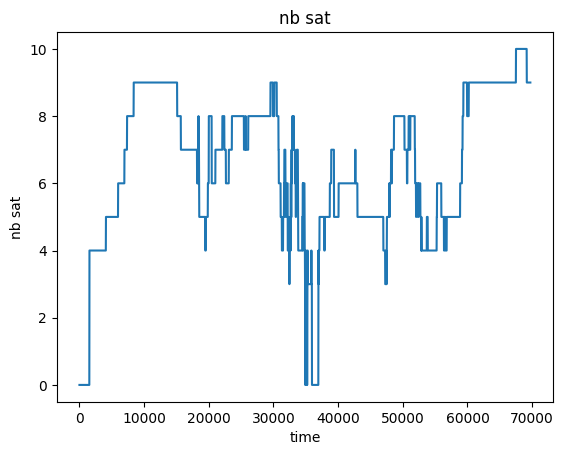

In [31]:
fig,ax = plt.subplots(1)
ax.set_title('nb sat')
ax.set_xlabel('time')
ax.set_ylabel('nb sat')
ax.plot(gps_t,nsats)

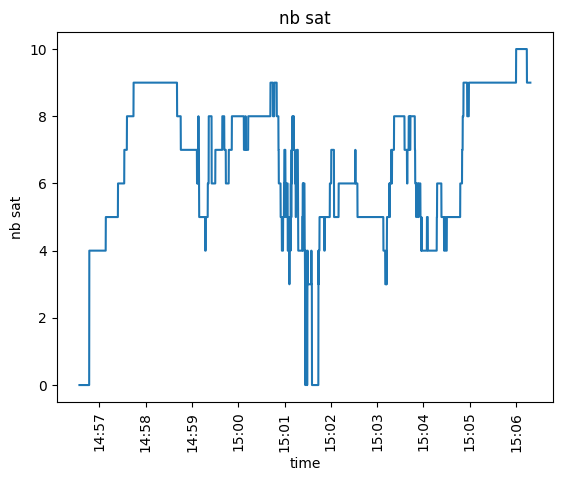

In [28]:
fig,ax = plt.subplots(1)
ax.set_title('nb sat')
ax.set_xlabel('time')
ax.set_ylabel('nb sat')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M')) #:%S'))

ax.tick_params(axis='x',rotation=90)

ax.plot(datetime_gps,nsats[1:-1])

#### get time and date from exif

use `identify` from imagemagick

    identify -format "%[EXIF:DateTime]\n" *.jpg

Edit with vi or write some code to get the following list.

In [29]:
dates_tick = []
dates_tick.append(dt.datetime.strptime("2024:07:19 14:59:08","%Y:%m:%d %H:%M:%S"))
dates_tick.append(dt.datetime.strptime("2024:07:19 14:59:32","%Y:%m:%d %H:%M:%S")) 
dates_tick.append(dt.datetime.strptime("2024:07:19 15:00:18","%Y:%m:%d %H:%M:%S")) 
dates_tick.append(dt.datetime.strptime("2024:07:19 15:00:58","%Y:%m:%d %H:%M:%S")) 
dates_tick.append(dt.datetime.strptime("2024:07:19 15:01:33","%Y:%m:%d %H:%M:%S")) 
dates_tick.append(dt.datetime.strptime("2024:07:19 15:01:49","%Y:%m:%d %H:%M:%S")) 
dates_tick.append(dt.datetime.strptime("2024:07:19 15:02:17","%Y:%m:%d %H:%M:%S")) 
dates_tick.append(dt.datetime.strptime("2024:07:19 15:02:36","%Y:%m:%d %H:%M:%S")) 
dates_tick.append(dt.datetime.strptime("2024:07:19 15:04:04","%Y:%m:%d %H:%M:%S")) 
dates_tick.append(dt.datetime.strptime("2024:07:19 15:04:31","%Y:%m:%d %H:%M:%S")) 

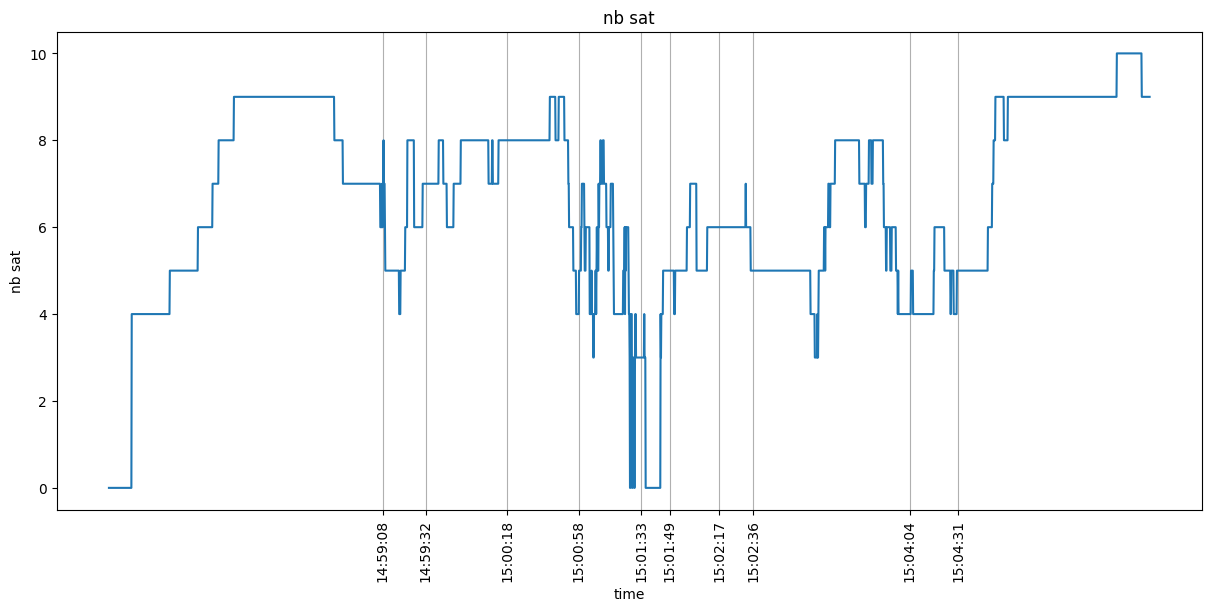

In [34]:
fig,ax = plt.subplots(1, figsize=(12, 6),layout='constrained')
ax.set_title('nb sat')
ax.set_xlabel('time')
ax.set_ylabel('nb sat')
ax.plot(datetime_gps,nsats[1:-1])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

ax.tick_params(axis='x',rotation=90)
# ax.set_xticks( [dates_tick[0],dates_tick[1],dates_tick[2],dates_tick[3]])
ax.set_xticks( dates_tick)
ax.grid(True,axis='x')
plt.savefig("gps_antenna_location_nbsats.svg", format='svg')

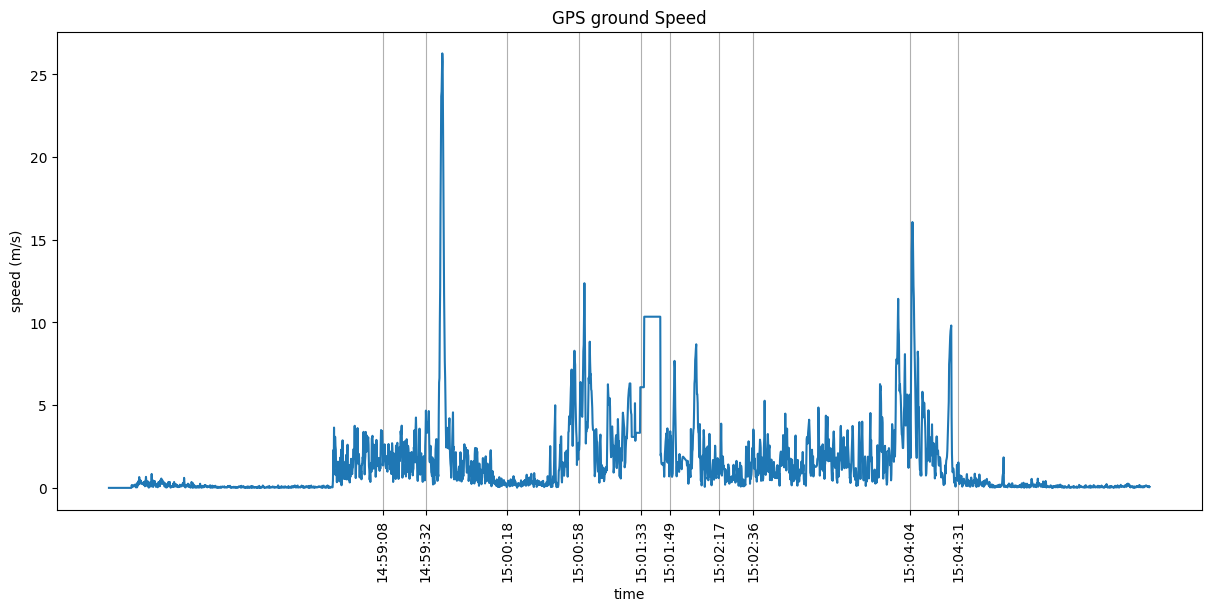

In [35]:
fig,ax = plt.subplots(1, figsize=(12, 6),layout='constrained')
ax.set_title('GPS ground Speed')
ax.set_xlabel('time')
ax.set_ylabel('speed (m/s)')
ax.plot(datetime_gps,gps_speed[1:-1])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

ax.tick_params(axis='x',rotation=90)
# ax.set_xticks( [dates_tick[0],dates_tick[1],dates_tick[2],dates_tick[3]])
ax.set_xticks( dates_tick)
ax.grid(True,axis='x')
plt.savefig("gps_antenna_location_gndspeed.svg", format='svg')

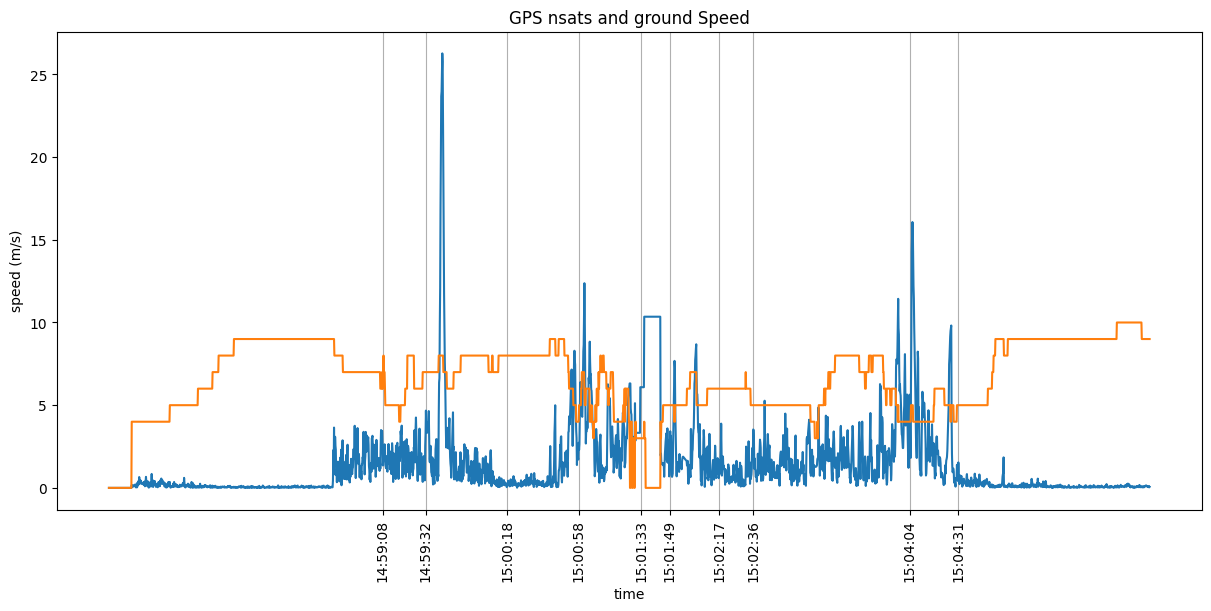

In [37]:
fig,ax = plt.subplots(1, figsize=(12, 6),layout='constrained')
ax.set_title('GPS nsats and ground Speed')
ax.set_xlabel('time')
ax.set_ylabel('speed (m/s)')
ax.plot(datetime_gps,gps_speed[1:-1])
ax.plot(datetime_gps,nsats[1:-1])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

ax.tick_params(axis='x',rotation=90)
# ax.set_xticks( [dates_tick[0],dates_tick[1],dates_tick[2],dates_tick[3]])
ax.set_xticks( dates_tick)
ax.grid(True,axis='x')
plt.savefig("gps_antenna_location_nsats_gndspeed.svg", format='svg')

In [26]:
hours = mdates.drange(logtstart,logtend,dt.timedelta(minutes=1))
print(hours)

[19923.62261806 19923.6233125  19923.62400694 19923.62470139
 19923.62539583 19923.62609028 19923.62678472 19923.62747917
 19923.62817361 19923.62886806]


In [ ]:
fig,ax = plt.subplots(1)
ax.set_title('nb sat')
ax.set_xlabel('time')
ax.set_ylabel('nb sat')

# pouet
# ax.plot(hours,nsats)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.plot(hours,nsats)
# plt.plot(nsats)
plt.gcf().autofmt_xdate()
plt.show()

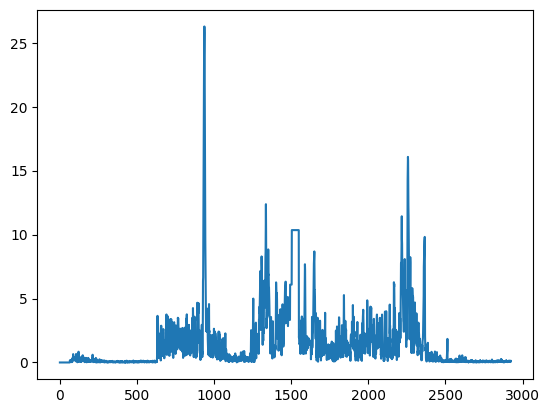

In [16]:
fig,ax = plt.subplots(1)
ax.plot(gps_speed)

(0.0, 0.5)

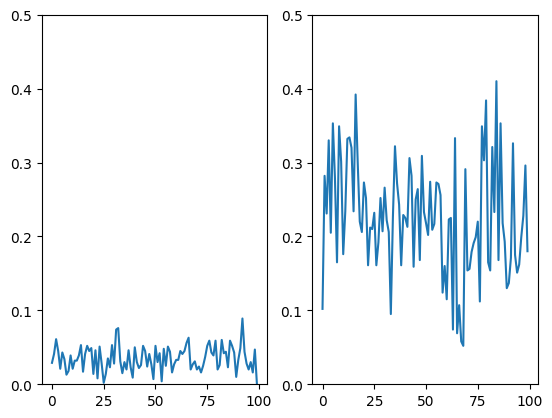

In [26]:
fig,ax = plt.subplots(1,2)
# ax[0].plot(gps_speed[1450:1550])
# ax[1].plot(gps_speed[1780:1900])
ax[0].plot(gps_speed[zoomrange1])
ax[1].plot(gps_speed[zoomrange2])
ax[0].set_ylim([0,0.5])
ax[1].set_ylim([0,0.5])

(-0.2, 1.3)

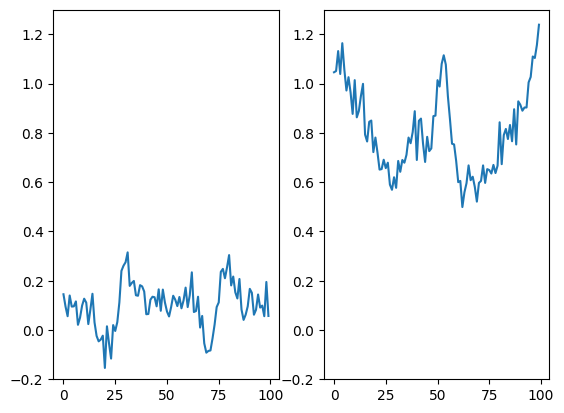

In [35]:
fig,ax = plt.subplots(1,2)
# ax[0].plot(gps_speed[1450:1550])
# ax[1].plot(gps_speed[1780:1900])
ax[0].plot(gps_vz[zoomrange1])
ax[1].plot(gps_vz[zoomrange2])
ax[0].set_ylim([-0.20,1.3])
ax[1].set_ylim([-0.20,1.3])

In [50]:
gps_speed_rms = np.sqrt(np.mean(gps_speed[zoomrange]**2))
print(gps_speed_rms)

0.04419898403123528


In [29]:
# ground speed
gps_speed_rms1 = np.sqrt(np.mean(gps_speed[zoomrange1]**2))
gps_speed_rms2 = np.sqrt(np.mean(gps_speed[zoomrange2]**2))
ratio = gps_speed_rms2 / gps_speed_rms1
print(gps_speed_rms1,gps_speed_rms2, ratio )

0.0389716579626014 0.23777885737552343 6.101327729082107


In [36]:
# vertical speed
gps_vz_rms1 = np.sqrt(np.mean(gps_vz[zoomrange1]**2))
gps_vz_rms2 = np.sqrt(np.mean(gps_vz[zoomrange2]**2))
ratio = gps_vz_rms2 / gps_vz_rms1
print(gps_vz_rms1,gps_vz_rms2, ratio )

0.13545811806319336 0.8232086551754252 6.077219047081293


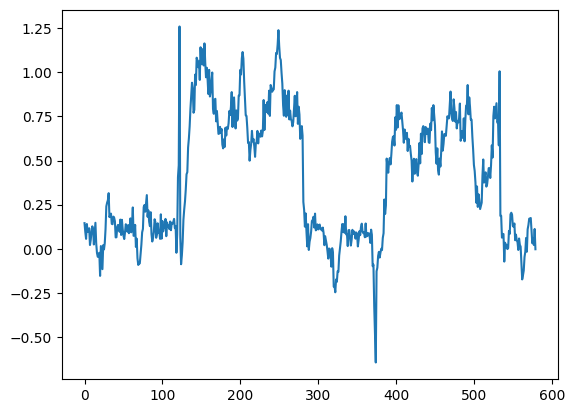

In [30]:
fig,ax = plt.subplots(1)
ax.plot(gps_vz)

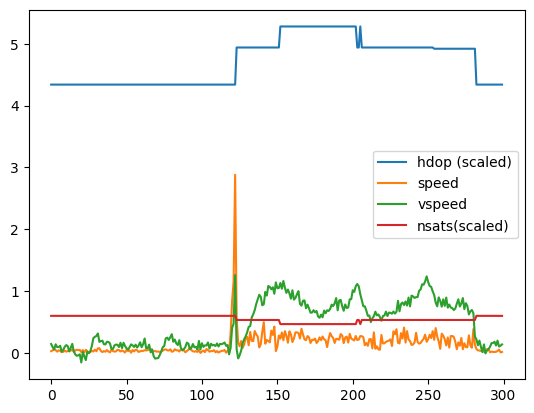

In [33]:
fig,ax = plt.subplots(1)
ax.plot(2*gps_hdop[zoomrange]+2,label = 'hdop (scaled)')
ax.plot(gps_speed[zoomrange],label = 'speed')
ax.plot(gps_vz[zoomrange],label = 'vspeed')
ax.plot(nsats[zoomrange]/15,label = 'nsats(scaled)')
ax.legend()

In [20]:
type(mydf_gps['NSats'])

pandas.core.series.Series

In [21]:
print(mydf_visp[:10])

      timestamp     TimeUS           RTimeUS  CTimeMS        PX        PY  \
0  1.721288e+09  127542384  1716906469403724   127539 -0.002420 -0.015665   
1  1.721288e+09  127602538  1716906469464638   127600 -0.002488 -0.015737   
2  1.721288e+09  127652524  1716906469513653   127649 -0.002566 -0.015778   
3  1.721288e+09  127694808  1716906469555903   127691 -0.002552 -0.015846   
4  1.721288e+09  127742364  1716906469604534   127740 -0.002541 -0.015932   
5  1.721288e+09  127794803  1716906469657633   127793 -0.002616 -0.016011   
6  1.721288e+09  127852334  1716906469714404   127850 -0.002691 -0.016089   
7  1.721288e+09  127897509  1716906469758393   127894 -0.002749 -0.016174   
8  1.721288e+09  127942335  1716906469803704   127939 -0.002862 -0.016241   
9  1.721288e+09  127992333  1716906469854812   127990 -0.002989 -0.016355   

         PZ         R         P         Y  PErr  AErr  Rst  Ign  Q  
0  0.036638  0.138146  4.111147  0.279282   0.5   0.2    0    0  0  
1  0.036803  0

In [22]:
print(mydf_visp[:10]['PX'])

0   -0.002420
1   -0.002488
2   -0.002566
3   -0.002552
4   -0.002541
5   -0.002616
6   -0.002691
7   -0.002749
8   -0.002862
9   -0.002989
Name: PX, dtype: float64


In [23]:
print(mydf_visp['PX'][:10])

0   -0.002420
1   -0.002488
2   -0.002566
3   -0.002552
4   -0.002541
5   -0.002616
6   -0.002691
7   -0.002749
8   -0.002862
9   -0.002989
Name: PX, dtype: float64


In [24]:
px,py,pz = mydf_visp['PX'], mydf_visp['PY'], mydf_visp['PZ']

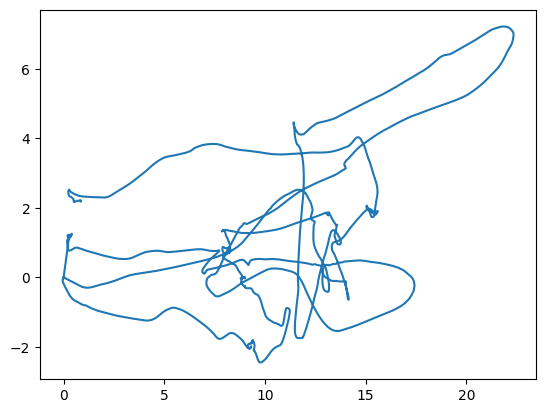

In [25]:
fig,ax = plt.subplots(1)
ax.plot(px,py)
plt.show()

In [26]:
plt.show()

In [27]:
magx,magy,magz = mydf_mag['MagX'], mydf_mag['MagY'], mydf_mag['MagZ']

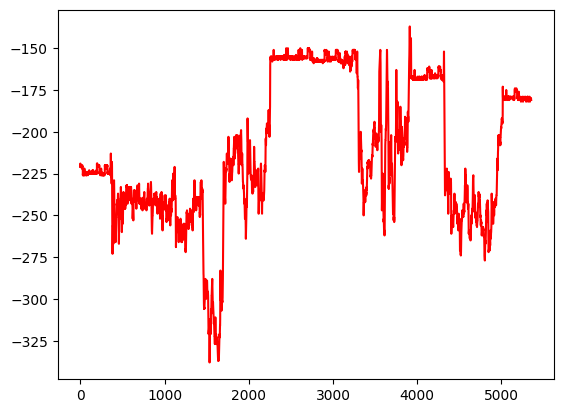

In [28]:
fig,ax = plt.subplots(1)
ax.plot(magx,'r')
# ax.plot(magx[:100],'r')
# ax.plot(magy,'g')
# ax.plot(magz[:100],'b')
plt.show()

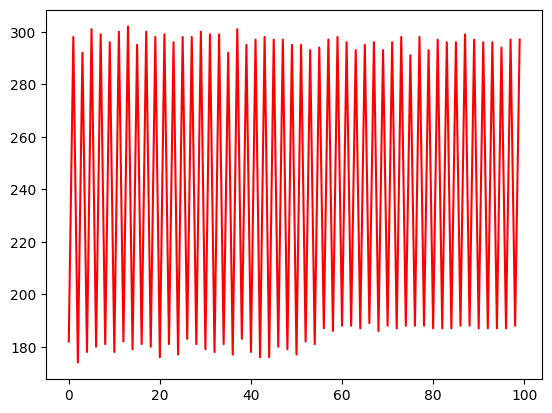

In [24]:
fig,ax = plt.subplots(1)
# ax.plot(magx,'r')
ax.plot(magx[:100],'r')
# ax.plot(magy,'g')
# ax.plot(magz[:100],'b')
plt.show()